# Intro

## Librerías

In [62]:
# Data
import os
import numpy as np
import pandas as pd

# SkLearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Display
from IPython.display import clear_output

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Input, Dropout, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Gradient Boosting
import xgboost as xgb

# Import/Export
import pickle
import joblib

# Optimización Inversa
from scipy.optimize import differential_evolution, minimize

In [3]:
REPO_NAME = "Multi-Parameter_Wireless_Network"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/MiguelMussi/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'Multi-Parameter_Wireless_Network'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 120 (delta 54), reused 21 (delta 6), pack-reused 0
Receiving objects: 100% (120/120), 5.64 MiB | 5.65 MiB/s, done.
Resolving deltas: 100% (54/54), done.


Establecer GPU por defecto en caso de estar disponible.

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


## DataFrame

In [4]:
# Leer el archivo de texto
with open('datos.txt', 'r') as file:
    data = file.read()

# Dividir los datos por líneas y luego por espacios
lines = data.strip().split('\n')
rows = [line.split() for line in lines]

# Convertir la lista de listas en un DataFrame
df = pd.DataFrame(rows)

# # Asignar nombres a las columnas
# df.columns = ['ID', 'Value1', 'Value2', 'Value3', 'Value4', ...]

# Convertir los datos a tipos numéricos
df = df.apply(pd.to_numeric)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
0,100,5,15,25,250,7,45,25,20,11,...,20,110,25,80,3,90,12,12.42,8.52,21.36
1,100,3,105,6,260,7,90,6,20,11,...,6,25,12,30,7,45,12,18.92,6.64,21.18
2,110,-3,45,12,250,7,45,25,20,3,...,14,65,12,30,13,110,6,12.63,6.59,17.89
3,100,3,105,6,270,3,105,6,330,13,...,10,25,25,70,15,110,25,11.07,9.36,22.05
4,100,3,105,6,280,11,15,12,330,13,...,10,25,6,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13045,100,3,105,6,280,11,15,12,20,5,...,4,90,6,70,5,15,25,13.17,6.56,17.95
13046,100,3,105,6,250,3,65,25,0,5,...,6,25,12,60,13,25,25,14.46,9.37,20.56
13047,70,7,65,25,300,11,105,6,0,3,...,22,65,12,70,15,110,25,11.45,11.85,22.78
13048,90,13,25,6,300,11,105,6,350,13,...,22,65,12,30,7,15,12,13.34,8.40,20.63


## Análisis Exploratorio

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13050 entries, 0 to 13049
Columns: 227 entries, 0 to 226
dtypes: float64(3), int64(224)
memory usage: 22.6 MB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,...,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000,13050.000000
mean,89.586207,5.319234,55.649425,14.404981,270.416858,4.803372,65.281226,13.019464,144.609195,3.737471,...,13.056552,60.101916,12.805824,59.944828,7.225900,66.101149,13.732720,13.819103,6.852890,18.978404
std,23.134292,6.764749,36.617691,8.870561,17.826860,5.620291,34.270328,7.984366,163.329095,7.435268,...,5.620269,37.038539,8.447817,23.166062,6.115789,39.389915,7.295834,9.745493,3.191472,6.244571
min,70.000000,-7.000000,15.000000,6.000000,250.000000,-5.000000,15.000000,6.000000,0.000000,-7.000000,...,4.000000,15.000000,6.000000,30.000000,-3.000000,15.000000,6.000000,0.130000,2.050000,6.950000
25%,70.000000,-1.000000,25.000000,6.000000,260.000000,3.000000,45.000000,6.000000,0.000000,-5.000000,...,6.000000,25.000000,6.000000,30.000000,3.000000,25.000000,6.000000,6.560000,4.510000,14.442500
50%,80.000000,7.000000,25.000000,12.000000,260.000000,5.000000,65.000000,12.000000,30.000000,3.000000,...,14.000000,45.000000,6.000000,70.000000,7.000000,65.000000,12.000000,12.455000,6.345000,18.890000
75%,110.000000,11.000000,105.000000,25.000000,280.000000,11.000000,105.000000,25.000000,350.000000,13.000000,...,20.000000,105.000000,25.000000,80.000000,13.000000,110.000000,25.000000,17.290000,8.220000,22.620000
max,130.000000,13.000000,110.000000,25.000000,300.000000,13.000000,110.000000,25.000000,350.000000,13.000000,...,22.000000,110.000000,25.000000,90.000000,15.000000,110.000000,25.000000,44.080000,21.400000,40.370000


## Renombrar columnas

In [8]:
df.columns

RangeIndex(start=0, stop=227, step=1)

In [9]:
def renombrar_columnas(df):
    new_col_names = [f'{i+1}' for i in range(df.shape[1]-3)]
    new_col_names.extend(['R1', 'R2', 'R3'])
    df.columns = new_col_names
    return df

In [10]:
df = renombrar_columnas(df)

In [11]:
df

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,R1,R2,R3
0,100,5,15,25,250,7,45,25,20,11,...,20,110,25,80,3,90,12,12.42,8.52,21.36
1,100,3,105,6,260,7,90,6,20,11,...,6,25,12,30,7,45,12,18.92,6.64,21.18
2,110,-3,45,12,250,7,45,25,20,3,...,14,65,12,30,13,110,6,12.63,6.59,17.89
3,100,3,105,6,270,3,105,6,330,13,...,10,25,25,70,15,110,25,11.07,9.36,22.05
4,100,3,105,6,280,11,15,12,330,13,...,10,25,6,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13045,100,3,105,6,280,11,15,12,20,5,...,4,90,6,70,5,15,25,13.17,6.56,17.95
13046,100,3,105,6,250,3,65,25,0,5,...,6,25,12,60,13,25,25,14.46,9.37,20.56
13047,70,7,65,25,300,11,105,6,0,3,...,22,65,12,70,15,110,25,11.45,11.85,22.78
13048,90,13,25,6,300,11,105,6,350,13,...,22,65,12,30,7,15,12,13.34,8.40,20.63


In [12]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '218', '219', '220', '221', '222', '223', '224', 'R1', 'R2', 'R3'],
      dtype='object', length=227)

## Filas Duplicadas

In [13]:
filas_duplicadas = df.duplicated().any()
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas.") if filas_duplicadas.any() else print("No hay filas duplicadas.")

Hay 877 filas duplicadas.


In [14]:
filas_duplicadas = df[df.duplicated()]
filas_duplicadas

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,R1,R2,R3
900,130,11,105,6,280,-5,45,25,340,-1,...,20,105,6,90,13,25,12,7.68,5.67,13.22
901,70,13,105,6,260,-5,45,6,30,-7,...,20,105,6,60,13,25,25,6.10,3.65,10.52
902,90,13,25,6,260,-5,45,6,10,13,...,6,45,6,40,5,110,25,5.38,4.18,11.01
903,70,13,105,6,250,5,45,12,30,-7,...,20,105,6,60,13,25,25,4.95,3.57,10.30
904,130,11,105,6,250,7,45,25,0,13,...,16,25,6,30,13,110,6,2.47,14.50,25.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12545,110,-5,90,6,250,7,45,25,0,7,...,8,65,25,80,5,45,6,13.07,7.71,19.45
12546,80,-5,45,6,270,3,105,6,10,7,...,12,105,6,80,3,90,12,17.19,6.84,19.59
12547,70,-1,25,25,260,11,110,6,30,-7,...,16,110,25,80,-3,65,6,17.93,5.63,19.37
12548,80,-5,45,6,260,-3,65,12,330,13,...,8,65,25,30,9,105,6,14.15,7.98,19.44


In [15]:
def eliminar_registros_duplicados(df):
    df_clean = df.drop_duplicates()
    return df_clean

In [16]:
df = eliminar_registros_duplicados(df)

In [17]:
df.shape

(12173, 227)

## Train / Test

In [18]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [19]:
df_train.shape, df_test.shape

((9738, 227), (2435, 227))

## Normalización

In [20]:
def escalar_datos(df, scaler_dict=None):
    # Si no se proporciona un diccionario de scalers, inicializar uno
    if scaler_dict is None:
        scaler_dict = {}

    # Iterar sobre cada columna en el DataFrame
    for columna in df.columns:
        # Inicializar un scaler para cada columna si no está en el diccionario
        if columna not in scaler_dict:
            scaler_dict[columna] = MinMaxScaler()
        # Escalar la columna y reemplazar los valores en el DataFrame
        df[columna] = scaler_dict[columna].fit_transform(df[[columna]])

    # Devolver el DataFrame escalado y el diccionario de scalers
    return df, scaler_dict

In [21]:
df_train, train_scaler_dict = escalar_datos(df_train)

In [22]:
df_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,R1,R2,R3
count,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,...,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000,9738.000000
mean,0.336551,0.608934,0.428111,0.432203,0.417498,0.542582,0.528737,0.372534,0.407951,0.549825,...,0.516590,0.479105,0.366167,0.485504,0.560793,0.547648,0.401866,0.316315,0.256120,0.368477
std,0.387875,0.339971,0.385476,0.464381,0.359026,0.313426,0.361720,0.422651,0.465819,0.369735,...,0.308815,0.394490,0.446920,0.385650,0.340164,0.414872,0.385392,0.226832,0.167103,0.186761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.300000,0.105263,0.000000,0.200000,0.444444,0.315789,0.000000,0.000000,0.100000,...,0.222222,0.105263,0.000000,0.000000,0.222222,0.105263,0.000000,0.146359,0.133333,0.239796
50%,0.166667,0.600000,0.315789,0.315789,0.200000,0.555556,0.526316,0.315789,0.085714,0.600000,...,0.555556,0.315789,0.000000,0.666667,0.555556,0.526316,0.315789,0.285779,0.227907,0.363445
75%,0.666667,0.900000,0.947368,1.000000,0.600000,0.888889,0.947368,1.000000,1.000000,1.000000,...,0.888889,0.947368,1.000000,0.833333,0.888889,1.000000,1.000000,0.395449,0.325581,0.477791
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X/y Train

In [23]:
def separar_Xy(df, columnas_target):
# def separar_Xy(df, cant_var_target):
    # POR NOMBRE
    X = df.drop(columnas_target, axis=1).copy()
    y = df[columnas_target].copy()

    # POR CANTIDAD
    # y = df.iloc[:, -cant_var_target:].copy()
    # X = df.iloc[:, :-cant_var_target].copy()

    return X, y

In [24]:
columnas_target = ['R1', 'R2', 'R3']
# cant_var_target = 3

In [25]:
X_train, y_train = separar_Xy(df_train, columnas_target=columnas_target)
# X_train, y_train = separar_Xy(df_train, cant_var_target)

## Visualizaciones

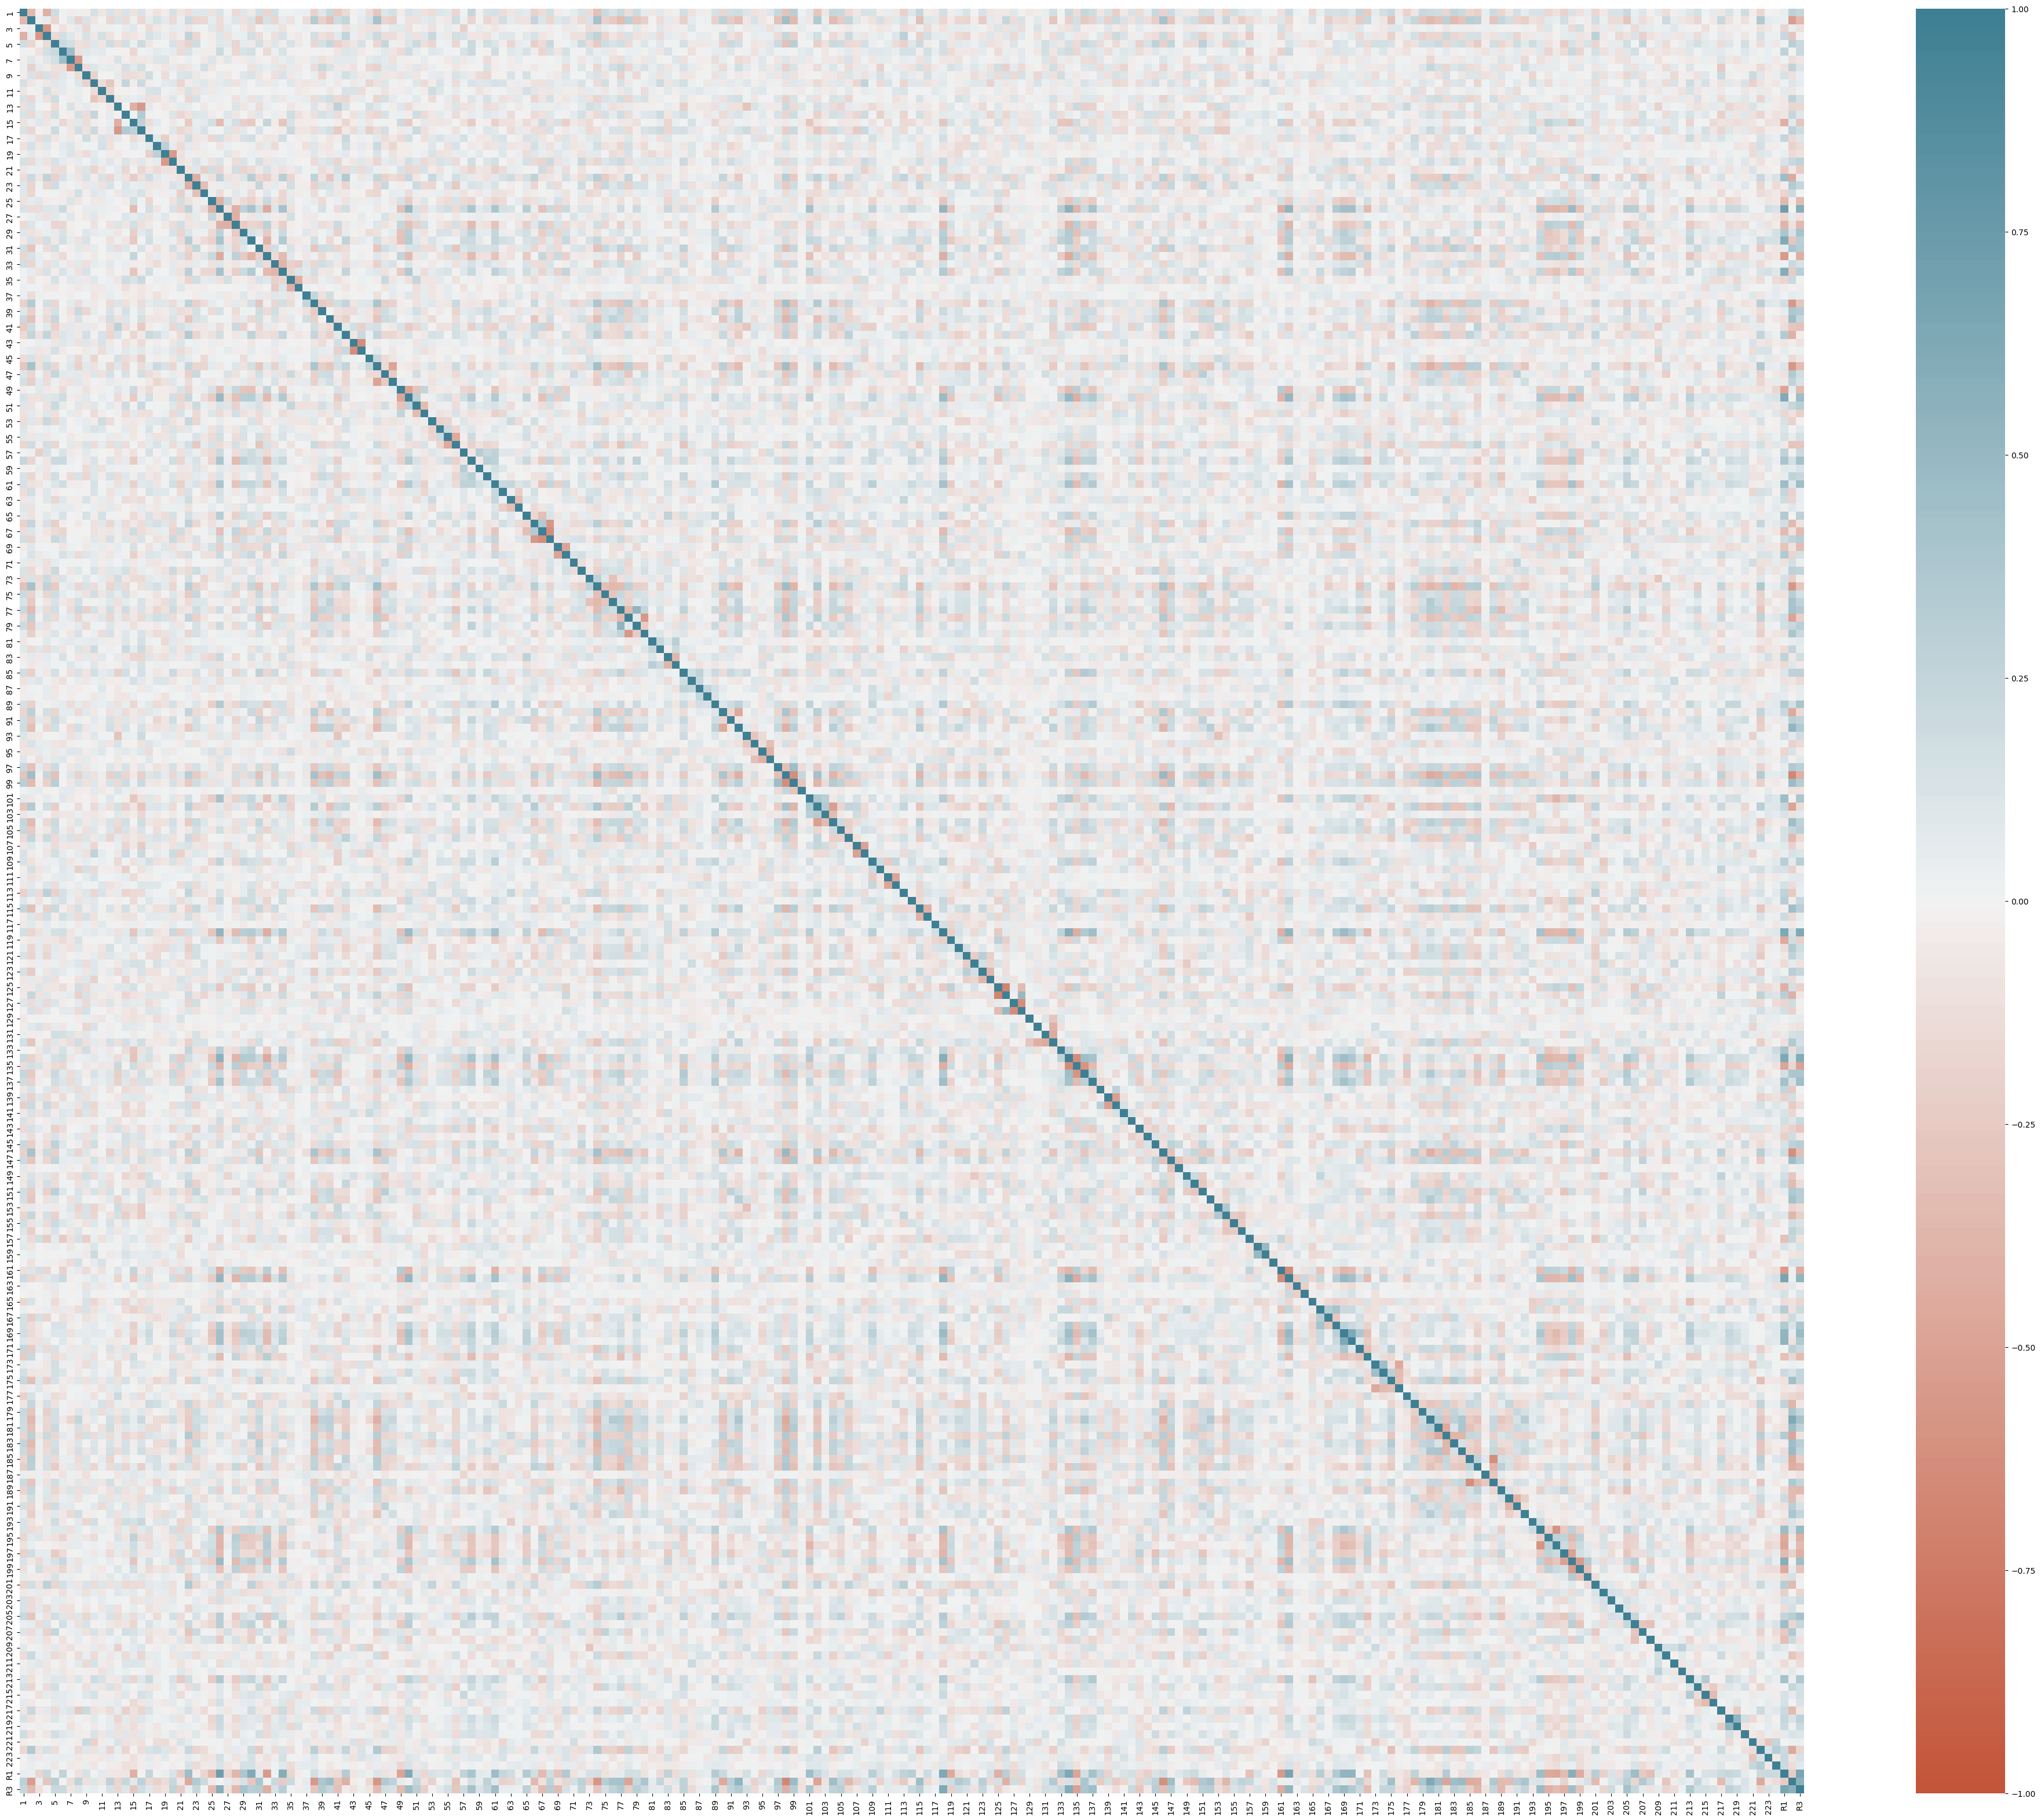

In [26]:
corr = df_train.corr()

plt.figure(figsize=(50, 40))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True,
    annot = False,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

## X/y Test

In [27]:
df_test_out = df_test.copy()
df_test_out = renombrar_columnas(df_test_out)
df_test_out = eliminar_registros_duplicados(df_test_out)
df_test_out, _ = escalar_datos(df_test_out, train_scaler_dict)

In [28]:
X_test, y_test = separar_Xy(df_test_out, columnas_target=columnas_target)
# X_test, y_test = separar_Xy(df_test_out, cant_var_target)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9738, 224), (9738, 3), (2435, 224), (2435, 3))

# MLP Regressor

### Optimizador de Hiperparámetros

In [ ]:
# Definir el modelo
mlp = MLPRegressor(max_iter=1000)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (50, 50), (50, 30, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    # 'alpha': [0.0001, 0.001, 0.01],
    # 'learning_rate': ['constant', 'adaptive'],
    # 'learning_rate_init': [0.001, 0.01],
    'early_stopping': [True]
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor conjunto de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

### Modelo MLP

In [31]:
# Crear y entrenar el MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 10 ), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

Error Cuadrático Medio: 0.0038745606054009277


In [32]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,R1,R2,R3,P_R1,P_R2,P_R3
10793,120,11,25,6,280,-5,45,25,20,5,...,30,-3,105,6,9.12,7.42,18.73,9.169259,7.434003,17.304976
6481,120,11,25,6,280,11,15,12,350,13,...,80,1,15,12,34.00,4.87,28.35,32.902119,5.545684,25.202991
9015,70,11,25,25,270,3,105,6,350,13,...,80,-3,65,6,2.64,6.32,13.20,2.537269,6.794302,13.368420
9864,120,11,25,6,270,11,65,25,330,13,...,60,13,25,25,9.76,10.58,20.80,9.003165,8.018696,15.778901
9108,110,-5,90,6,300,7,110,6,0,3,...,60,5,105,6,1.53,10.36,19.46,1.509601,9.417151,18.471419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,70,7,65,25,260,7,90,6,20,-5,...,90,-3,65,12,7.93,6.10,15.71,9.653003,5.521533,15.268932
6511,70,11,25,25,280,11,15,12,0,13,...,30,13,110,6,40.04,4.49,29.95,39.080649,4.228984,28.946271
6655,70,11,25,25,260,11,110,6,350,-5,...,30,13,110,6,41.08,3.31,29.29,40.142332,3.030478,28.488188
2043,70,7,65,25,250,3,65,25,20,-5,...,70,15,110,25,7.05,7.96,17.76,7.208683,6.353091,15.913716


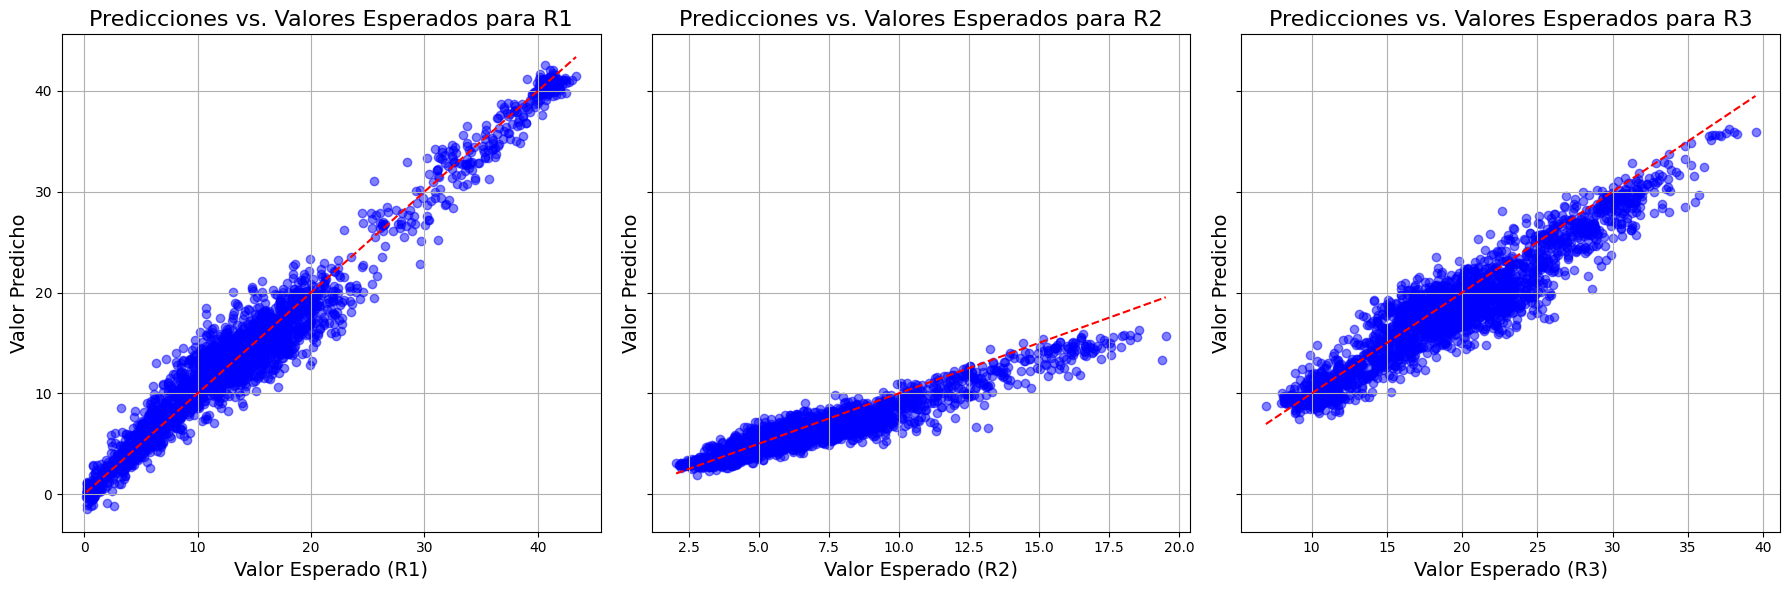

In [33]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# NN Densa

### Modelo

In [34]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(128, activation='relu'), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 256)               57600     
                                                                 
 dropout_46 (Dropout)        (None, 256)               0         
                                                                 
 dense_61 (Dense)            (None, 256)               65792     
                                                                 
 dropout_47 (Dropout)        (None, 256)               0         
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dropout_48 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)              

In [35]:
# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=20,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

# Definir el número de características (p) para calcular R2 ajustado
p = X_train.shape[1]

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)
print("-------------------------\nFin del Entrenamiento")

Inicio del Entrenamiento
-------------------------
Epoch 1/100
122/122 [==============================] - 3s 11ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - mae: 0.1303 - val_loss: 0.0115 - val_mean_squared_error: 0.0115 - val_mae: 0.0828 - lr: 0.0010
Epoch 2/100
122/122 [==============================] - 1s 9ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - mae: 0.0898 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mae: 0.0654 - lr: 0.0010
Epoch 3/100
122/122 [==============================] - 1s 9ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - mae: 0.0784 - val_loss: 0.0057 - val_mean_squared_error: 0.0057 - val_mae: 0.0579 - lr: 0.0010
Epoch 4/100
122/122 [==============================] - 1s 9ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - mae: 0.0724 - val_loss: 0.0054 - val_mean_squared_error: 0.0054 - val_mae: 0.0565 - lr: 0.0010
Epoch 5/100
122/122 [==============================] - 1s 8ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - mae

In [36]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

77/77 [==============================] - 0s 2ms/step


In [37]:
y_pred

array([[0.25119573, 0.27875865, 0.3396053 ],
       [0.7462115 , 0.15738049, 0.5742557 ],
       [0.09452587, 0.28392878, 0.26326218],
       ...,
       [0.8941885 , 0.09494585, 0.67560285],
       [0.16358566, 0.2646744 , 0.2845664 ],
       [0.8977088 , 0.09661971, 0.67899257]], dtype=float32)

In [38]:
y_pred.shape

(2435, 3)

## Métricas

In [39]:
def r2_ajustado(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    r2_aj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return r2_aj

In [40]:
n = y_test.shape[0]  # número total de observaciones en y_test (para cada variable de salida)
p = X_train.shape[1] # número de características en X_train
y_test_1 = np.array(y_test.iloc[:, 0])[:, np.newaxis]
y_pred_1 = np.array(y_pred[:, 0])[:, np.newaxis]
y_test_2 = np.array(y_test.iloc[:, 1])[:, np.newaxis]
y_pred_2 = np.array(y_pred[:, 1])[:, np.newaxis]
y_test_3 = np.array(y_test.iloc[:, 2])[:, np.newaxis]
y_pred_3 = np.array(y_pred[:, 2])[:, np.newaxis]

In [41]:
n, p

(2435, 224)

In [42]:
y_test_1.shape, y_pred_1.shape, y_test_2.shape, y_pred_2.shape, y_test_3.shape, y_pred_3.shape

((2435, 1), (2435, 1), (2435, 1), (2435, 1), (2435, 1), (2435, 1))

-------------------------
Métricas
Métricas para 225
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.04
R2 Score: 0.96
R2 Ajustado: 0.95

Métricas para 226
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.05
R2 Score: 0.83
R2 Ajustado: 0.81

Métricas para 227
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R2 Score: 0.90
R2 Ajustado: 0.89



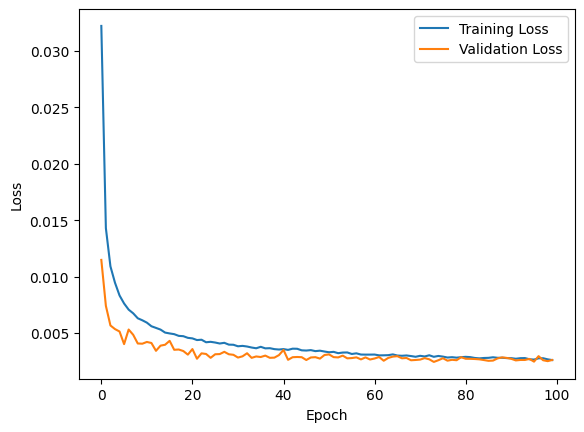

In [43]:
# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = y_test.shape[0]  # número total de observaciones en y_test (para cada variable de salida)
p = X_train.shape[1] # número de características en X_train

for i in range(y_test.shape[1]):
    y_test_i = np.array(y_test.iloc[:, i])[:, np.newaxis]  # Obtener las observaciones para la variable de salida i
    y_pred_i = np.array(y_pred[:, i])[:, np.newaxis]  # Obtener las predicciones para la variable de salida i

    r2_aj = r2_ajustado(y_test_i, y_pred_i, n, p)

    # Métricas de regresión para la variable de salida i
    mse = mean_squared_error(y_test_i, y_pred_i)
    mae = mean_absolute_error(y_test_i, y_pred_i)
    r2 = r2_score(y_test_i, y_pred_i)

    print(f"Métricas para {i + 225}")
    print("Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Mean Absolute Error (MAE): {:.2f}".format(mae))
    print("R2 Score: {:.2f}".format(r2))
    print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predicciones

In [44]:
df_test

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,R1,R2,R3
10793,120,11,25,6,280,-5,45,25,20,5,...,14,25,12,30,-3,105,6,9.12,7.42,18.73
6481,120,11,25,6,280,11,15,12,350,13,...,16,15,25,80,1,15,12,34.00,4.87,28.35
9015,70,11,25,25,270,3,105,6,350,13,...,20,105,6,80,-3,65,6,2.64,6.32,13.20
9864,120,11,25,6,270,11,65,25,330,13,...,18,90,12,60,13,25,25,9.76,10.58,20.80
9108,110,-5,90,6,300,7,110,6,0,3,...,20,110,25,60,5,105,6,1.53,10.36,19.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,70,7,65,25,260,7,90,6,20,-5,...,10,25,6,90,-3,65,12,7.93,6.10,15.71
6511,70,11,25,25,280,11,15,12,0,13,...,20,105,6,30,13,110,6,40.04,4.49,29.95
6655,70,11,25,25,260,11,110,6,350,-5,...,20,105,6,30,13,110,6,41.08,3.31,29.29
2043,70,7,65,25,250,3,65,25,20,-5,...,10,25,6,70,15,110,25,7.05,7.96,17.76


In [47]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,R1,R2,R3,P_R1,P_R2,P_R3
10793,120,11,25,6,280,-5,45,25,20,5,...,30,-3,105,6,9.12,7.42,18.73,11.036632,6.922701,18.004152
6481,120,11,25,6,280,11,15,12,350,13,...,80,1,15,12,34.00,4.87,28.35,32.411415,4.801011,25.642023
9015,70,11,25,25,270,3,105,6,350,13,...,80,-3,65,6,2.64,6.32,13.20,4.271627,7.013075,15.519184
9864,120,11,25,6,270,11,65,25,330,13,...,60,13,25,25,9.76,10.58,20.80,9.136386,7.641709,18.430790
9108,110,-5,90,6,300,7,110,6,0,3,...,60,5,105,6,1.53,10.36,19.46,3.634188,8.396930,17.681021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,70,7,65,25,260,7,90,6,20,-5,...,90,-3,65,12,7.93,6.10,15.71,7.312222,5.700891,14.535075
6511,70,11,25,25,280,11,15,12,0,13,...,30,13,110,6,40.04,4.49,29.95,38.762386,3.959095,29.496817
6655,70,11,25,25,260,11,110,6,350,-5,...,30,13,110,6,41.08,3.31,29.29,38.801060,3.709653,28.940872
2043,70,7,65,25,250,3,65,25,20,-5,...,70,15,110,25,7.05,7.96,17.76,7.253629,6.676508,16.212637


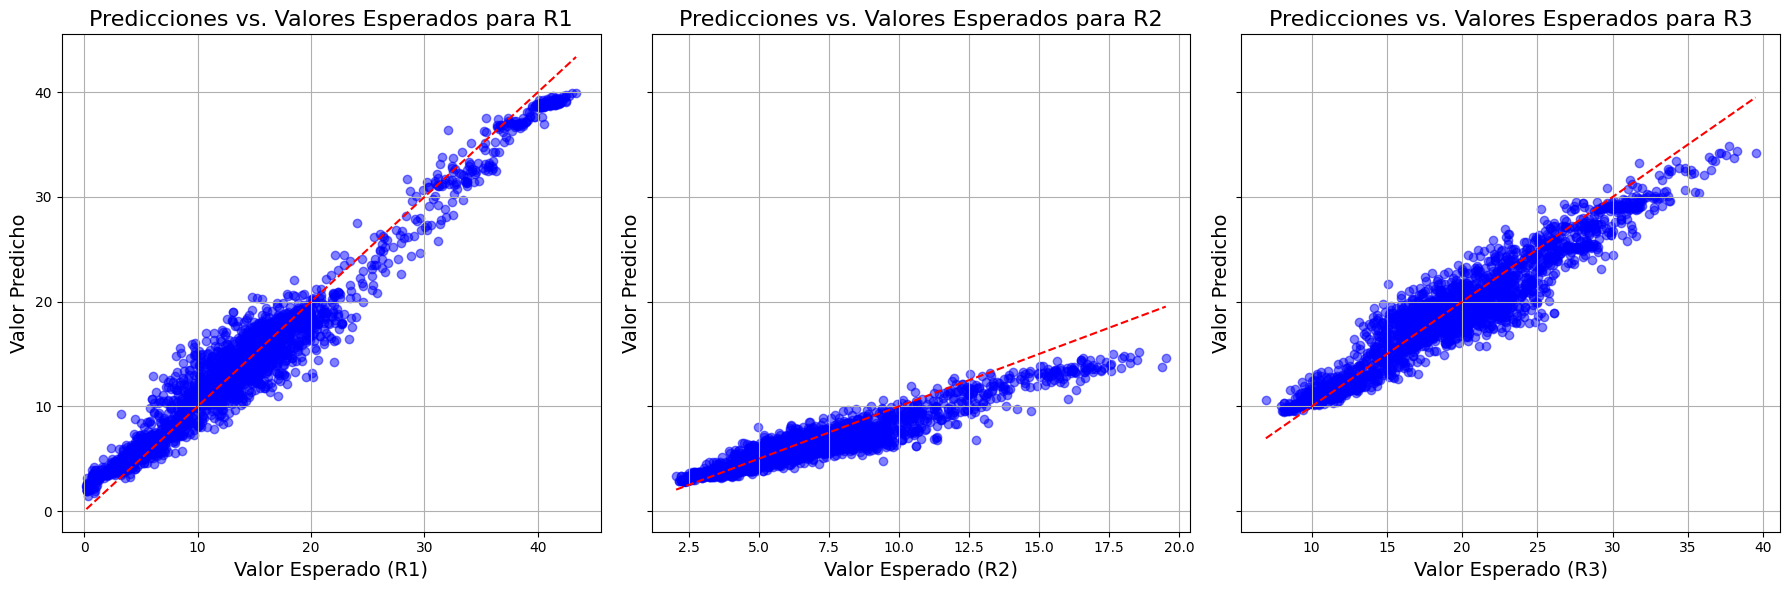

In [49]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Prueba de Modelos

In [50]:
# Definir la función objetivo para la optimización inversa
def objective_function(X):
    X = np.array(X).reshape(1, -1)
    predictions = model.predict(X)
    return -np.sum(predictions)  # Queremos maximizar la salida, así que minimizamos el negativo

### #1

-------------------------
Fin del Entrenamiento
77/77 [==============================] - 0s 2ms/step
-------------------------
Métricas
Métricas para 281
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.03
R2 Score: 0.96
R2 Ajustado: 0.96

Métricas para 282
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R2 Score: 0.87
R2 Ajustado: 0.86

Métricas para 283
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.04
R2 Score: 0.91
R2 Ajustado: 0.90

-------------------------
Curva de Aprendizaje


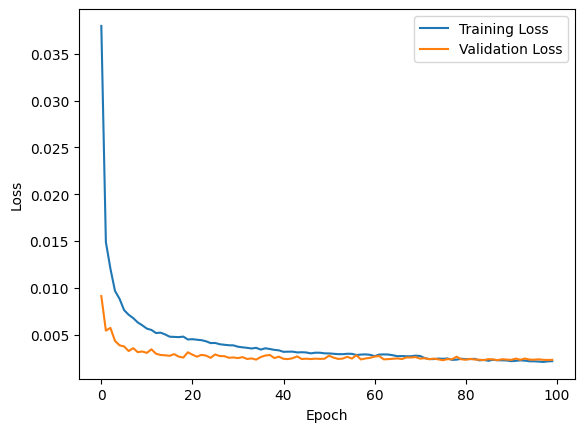

-------------------------
Predicciones


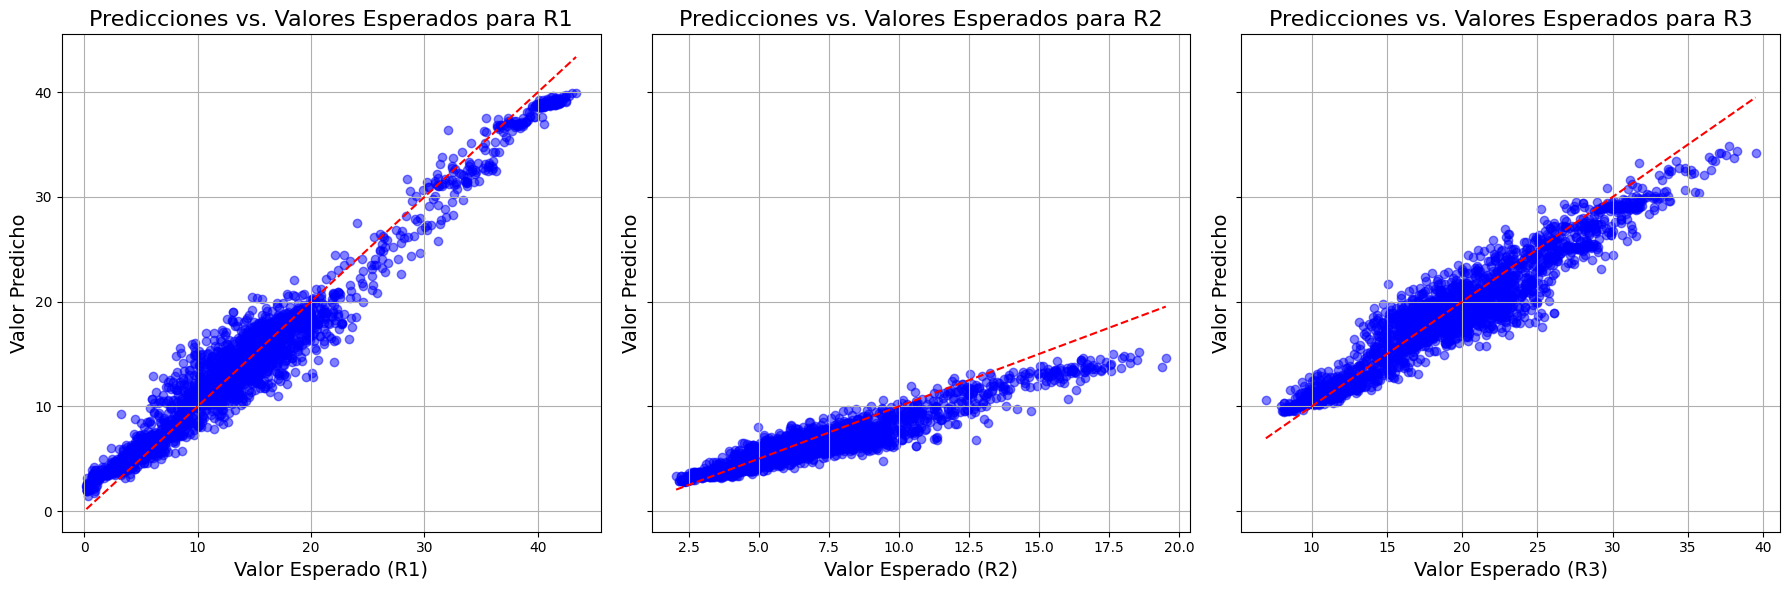

In [52]:
# Arquitectura
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])


# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=10,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)

clear_output(wait=True)
print("-------------------------\nFin del Entrenamiento")


# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = y_test.shape[0]  # número total de observaciones en y_test (para cada variable de salida)
p = X_train.shape[1] # número de características en X_train

for i in range(y_test.shape[1]):
    y_test_i = np.array(y_test.iloc[:, i])[:, np.newaxis]  # Obtener las observaciones para la variable de salida i
    y_pred_i = np.array(y_pred[:, i])[:, np.newaxis]  # Obtener las predicciones para la variable de salida i

    r2_aj = r2_ajustado(y_test_i, y_pred_i, n, p)

    # Métricas de regresión para la variable de salida i
    mse = mean_squared_error(y_test_i, y_pred_i)
    mae = mean_absolute_error(y_test_i, y_pred_i)
    r2 = r2_score(y_test_i, y_pred_i)

    print(f"Métricas para {i + 281}")
    print("Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Mean Absolute Error (MAE): {:.2f}".format(mae))
    print("R2 Score: {:.2f}".format(r2))
    print("R2 Ajustado: {:.2f}\n".format(r2_aj))



print("-------------------------\nCurva de Aprendizaje")
# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print("-------------------------\nPredicciones")
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [53]:
# Inicializar con un valor promedio para cada característica
X_initial = np.mean(X_train, axis=0)

# Ejecutar la optimización
result = minimize(objective_function, X_initial, method='L-BFGS-B', bounds=[(0, 1)] * X_train.shape[1])

# Obtener las entradas óptimas
X_optimal = result.x

# Revertir la normalización de las características
X_optimal_original = np.zeros_like(X_optimal)
for i, column in enumerate(X_train.columns):
    X_optimal_original[i] = train_scaler_dict[column].inverse_transform(X_optimal[i].reshape(1, -1))[0, 0]

# Ajustar las opciones de impresión de NumPy para evitar notación científica
np.set_printoptions(suppress=True, precision=8)

clear_output(wait=True)
print("Valores óptimos de las características (normalizados):", X_optimal)
print("Valores óptimos de las características (originales):", X_optimal_original)

Valores óptimos de las características (normalizados): [0.33655097 0.60893407 0.42811125 0.43220266 0.41749846 0.54258232
 0.52873712 0.37253408 0.40795118 0.54982543 0.52933165 0.16626671
 0.76324561 0.4646642  0.63149247 0.44838452 0.50809543 0.
 0.55910648 0.347029   0.56407887 0.47305402 0.38130601 0.52627255
 0.49192168 0.36385523 0.30608612 0.47689464 0.38787959 0.44992812
 0.31331409 0.63817816 0.31958992 0.43581844 0.45072669 0.34740193
 0.52524475 0.59612971 0.48081309 0.45751316 0.66272335 0.56029986
 0.46749035 0.3370356  0.68384532 0.49489971 0.47051161 0.39784458
 0.49673102 0.46640994 0.37554993 0.5111176  0.52096598 0.53698911
 0.45682135 0.57906627 0.42821935 0.3972787  0.52562938 0.28546876
 0.38021154 0.49054221 0.39705549 0.53872512 0.5644955  0.41223044
 0.54476224 0.33928938 0.60614774 0.50664407 0.3724476  0.49073083
 0.60939471 0.58923804 0.42150822 0.37141529 0.36838502 0.58184432
 0.3992282  0.39065625 0.66627644 0.45161224 0.45831847 0.39337484
 0.41892586 0.4

### #2

-------------------------
Fin del Entrenamiento
77/77 [==============================] - 0s 4ms/step
-------------------------
Métricas
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R2 Score: 0.90
R2 Ajustado: 0.90



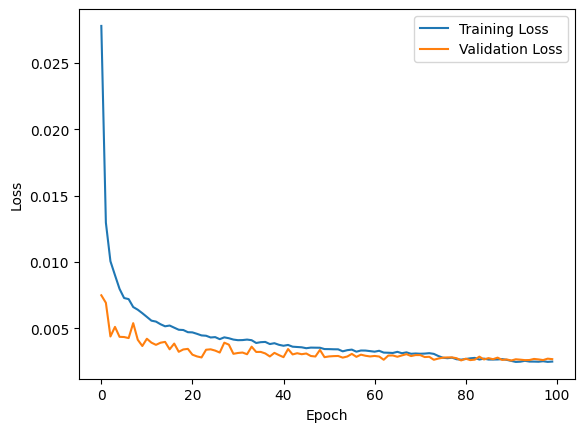

-------------------------
Predicciones


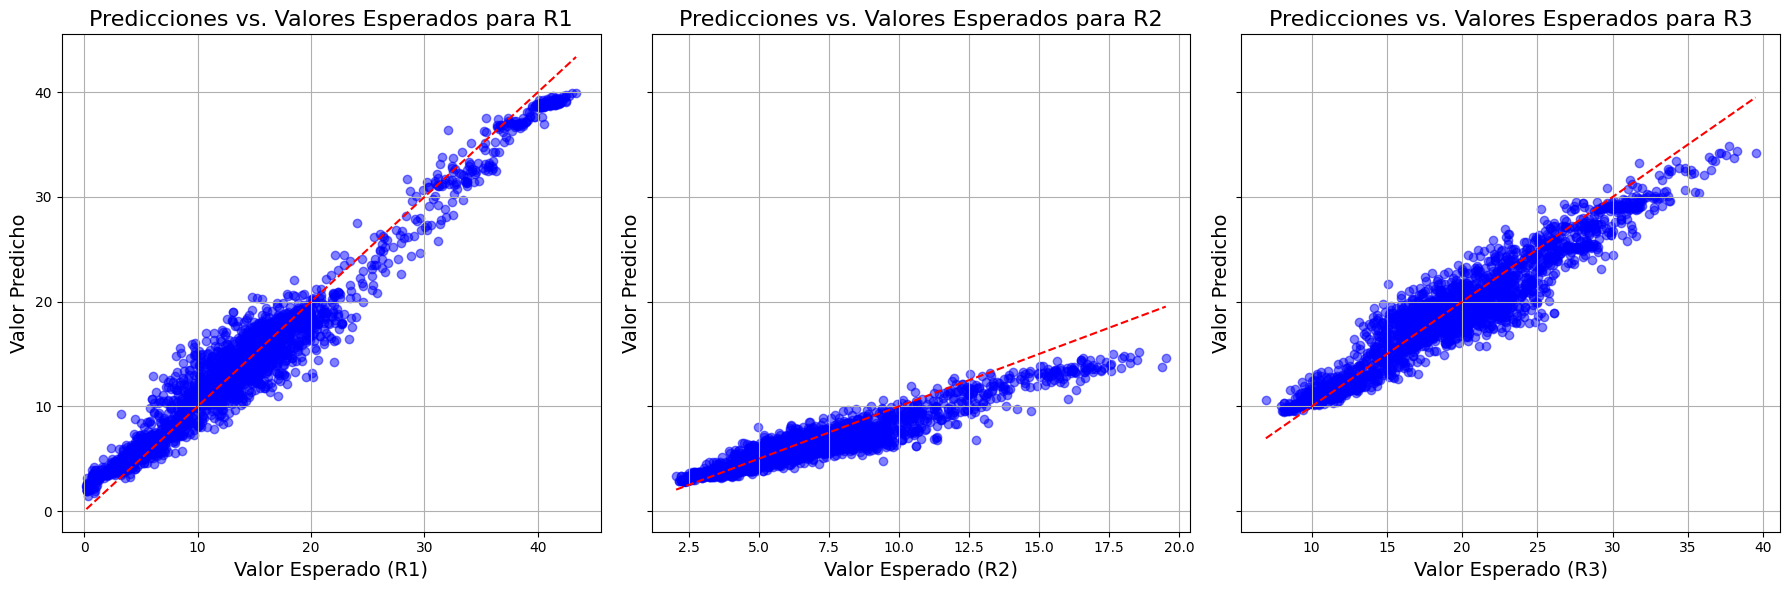

In [54]:
# Arquitectura
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(512, activation='relu'), Dropout(0.2),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(128, activation='relu'), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])


# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=10,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)

clear_output(wait=True)
print("-------------------------\nFin del Entrenamiento")


# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = y_test.shape[0] * y_test.shape[1]  # número total de observaciones en y_test
p = X_train.shape[1] # número de características en X_train
r2_aj = r2_ajustado(y_test, y_pred, n, p)

# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R2 Score: {:.2f}".format(r2))
print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print("-------------------------\nPredicciones")
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### #3

-------------------------
Fin del Entrenamiento
77/77 [==============================] - 0s 2ms/step
-------------------------
Métricas
Mean Squared Error (MSE): 240.12
Mean Absolute Error (MAE): 13.08
R2 Score: -4.18
R2 Ajustado: -4.71



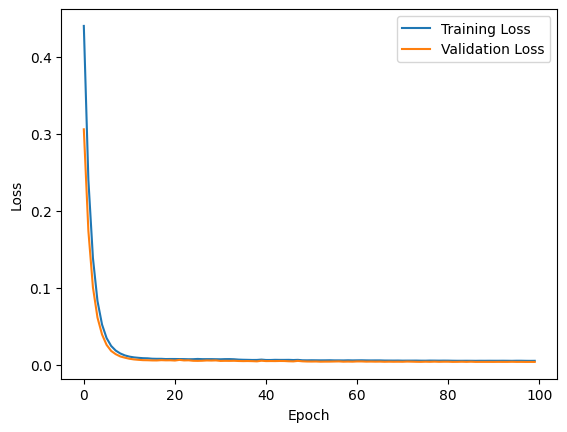

-------------------------
Predicciones


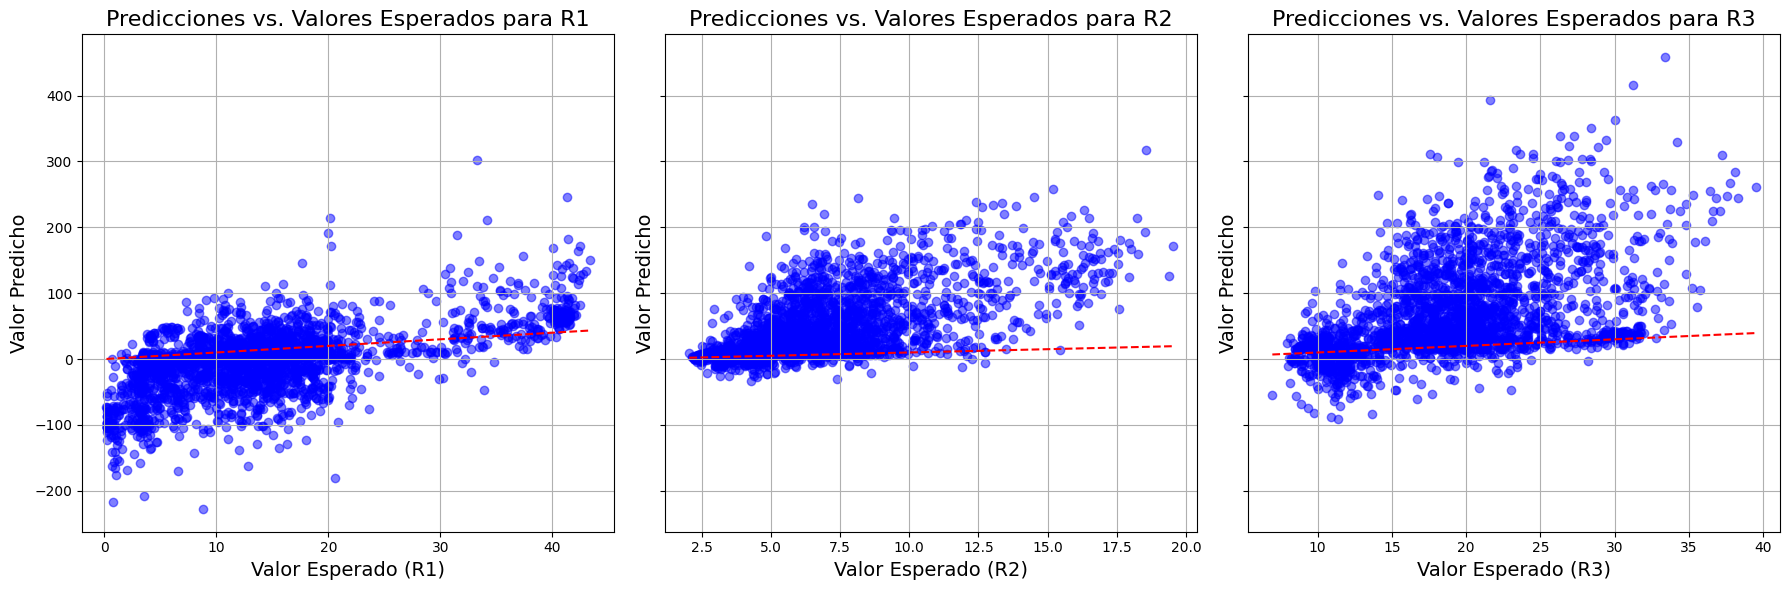

In [77]:
# Arquitectura
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)), Dropout(0.25),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), Dropout(0.25),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)), Dropout(0.25),
    Dense(3, activation='linear')
])


# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=10,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

# Definir el número de características (p) para calcular R2 ajustado
p = X_train.shape[1]

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)

clear_output(wait=True)
print("-------------------------\nFin del Entrenamiento")


# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = len(y_test)
r2_aj = r2_ajustado(y_test, y_pred, n, p)

# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R2 Score: {:.2f}".format(r2))
print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print("-------------------------\nPredicciones")
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# CNN

In [65]:
# Convertir DataFrames a Numpy Arrays
X_train = df_train.iloc[:, :-3].values
y_train = df_train.iloc[:, -3:].values

X_test = df_test.iloc[:, :-3].values
y_test = df_test.iloc[:, -3:].values

# Dar forma a los datos para Conv1D
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [87]:
# Definir el modelo CNN
def build_cnn_model(input_shape):
    model = Sequential()
    # Primera capa Conv1D con input_shape
    model.add(Conv1D(256, kernel_size=5, activation='relu', input_shape=(input_shape, 1)))
    model.add(Conv1D(128, kernel_size=5, activation='relu'))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3))  # Capa de salida para 3 variables
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

model = build_cnn_model(X_train_reshaped.shape[1])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 220, 256)          1536      
                                                                 
 conv1d_14 (Conv1D)          (None, 216, 128)          163968    
                                                                 
 conv1d_15 (Conv1D)          (None, 214, 64)           24640     
                                                                 
 conv1d_16 (Conv1D)          (None, 212, 32)           6176      
                                                                 
 flatten_5 (Flatten)         (None, 6784)              0         
                                                                 
 dense_34 (Dense)            (None, 64)                434240    
                                                                 
 dropout_26 (Dropout)        (None, 64)              

In [ ]:
# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

77/77 [==============================] - 1s 6ms/step
Métricas para variable 1
Mean Squared Error (MSE): 289.60
Mean Absolute Error (MAE): 14.31
R2 Score: -1.96
R2 Ajustado: -2.26

Métricas para variable 2
Mean Squared Error (MSE): 25.32
Mean Absolute Error (MAE): 4.43
R2 Score: -1.60
R2 Ajustado: -1.86

Métricas para variable 3
Mean Squared Error (MSE): 324.98
Mean Absolute Error (MAE): 17.21
R2 Score: -7.76
R2 Ajustado: -8.65



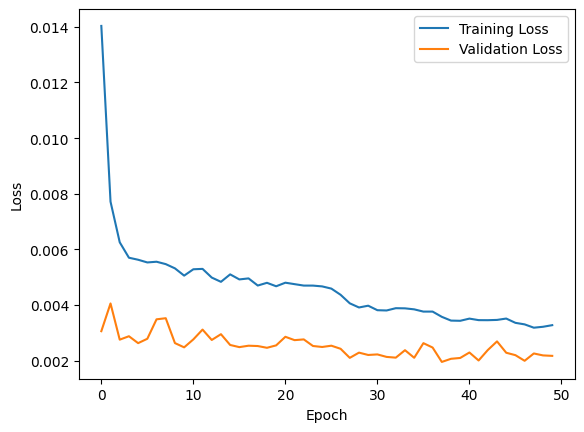

In [74]:
# Evaluar el modelo
y_pred = model.predict(X_test_reshaped)

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def r2_ajustado(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

n = y_test.shape[0]
p = X_train.shape[1]

for i in range(y_test.shape[1]):
    y_test_i = y_test[:, i]
    y_pred_i = y_pred[:, i]

    mse = mean_squared_error(y_test_i, y_pred_i)
    mae = mean_absolute_error(y_test_i, y_pred_i)
    r2 = r2_score(y_test_i, y_pred_i)
    r2_aj = r2_ajustado(y_test_i, y_pred_i, n, p)

    print(f"Métricas para variable {i + 1}")
    print("Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Mean Absolute Error (MAE): {:.2f}".format(mae))
    print("R2 Score: {:.2f}".format(r2))
    print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,R1,R2,R3,P_R1,P_R2,P_R3
10793,120,11,25,6,280,-5,45,25,20,5,...,30,-3,105,6,9.12,7.42,18.73,10.228875,5.599839,15.266821
6481,120,11,25,6,280,11,15,12,350,13,...,80,1,15,12,34.00,4.87,28.35,88.626984,48.746868,103.478561
9015,70,11,25,25,270,3,105,6,350,13,...,80,-3,65,6,2.64,6.32,13.20,-34.210964,86.508202,120.279755
9864,120,11,25,6,270,11,65,25,330,13,...,60,13,25,25,9.76,10.58,20.80,15.273093,36.507671,59.688492
9108,110,-5,90,6,300,7,110,6,0,3,...,60,5,105,6,1.53,10.36,19.46,-47.466297,64.261063,86.102394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,70,7,65,25,260,7,90,6,20,-5,...,90,-3,65,12,7.93,6.10,15.71,-26.465916,-0.236923,-8.542167
6511,70,11,25,25,280,11,15,12,0,13,...,30,13,110,6,40.04,4.49,29.95,128.252350,34.242626,105.900810
6655,70,11,25,25,260,11,110,6,350,-5,...,30,13,110,6,41.08,3.31,29.29,91.004692,0.826252,24.932125
2043,70,7,65,25,250,3,65,25,20,-5,...,70,15,110,25,7.05,7.96,17.76,-14.085940,45.299648,67.458633


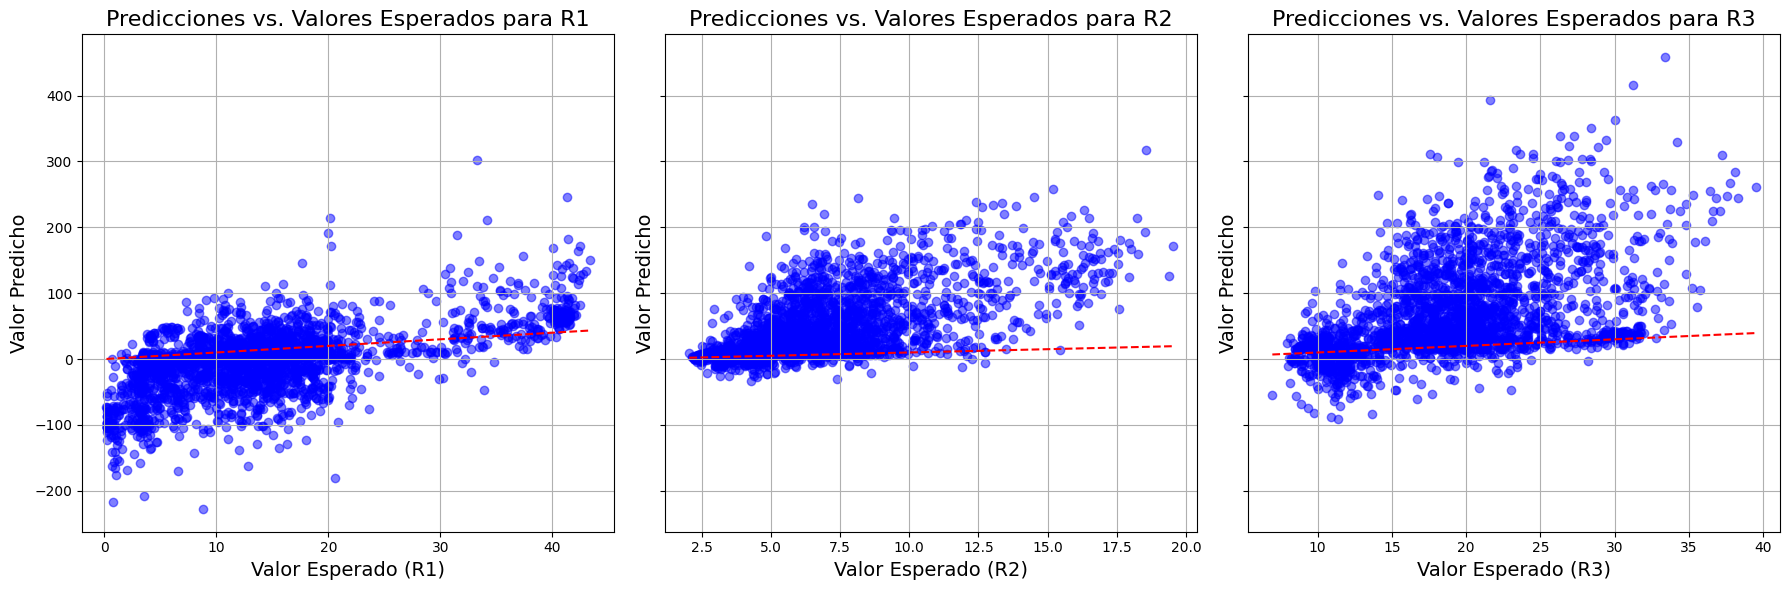

In [76]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# RandomForest

In [55]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [56]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,R1,R2,R3,P_R1,P_R2,P_R3
10793,120,11,25,6,280,-5,45,25,20,5,...,30,-3,105,6,9.12,7.42,18.73,11.595808,6.000390,16.878922
6481,120,11,25,6,280,11,15,12,350,13,...,80,1,15,12,34.00,4.87,28.35,33.428087,4.300448,25.836229
9015,70,11,25,25,270,3,105,6,350,13,...,80,-3,65,6,2.64,6.32,13.20,4.059007,6.218641,14.310676
9864,120,11,25,6,270,11,65,25,330,13,...,60,13,25,25,9.76,10.58,20.80,11.062125,7.124891,18.484149
9108,110,-5,90,6,300,7,110,6,0,3,...,60,5,105,6,1.53,10.36,19.46,3.256910,8.294741,17.772777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,70,7,65,25,260,7,90,6,20,-5,...,90,-3,65,12,7.93,6.10,15.71,8.525361,6.026948,15.799263
6511,70,11,25,25,280,11,15,12,0,13,...,30,13,110,6,40.04,4.49,29.95,39.096998,4.012277,29.040431
6655,70,11,25,25,260,11,110,6,350,-5,...,30,13,110,6,41.08,3.31,29.29,40.137051,3.220934,29.209824
2043,70,7,65,25,250,3,65,25,20,-5,...,70,15,110,25,7.05,7.96,17.76,8.226491,6.005268,15.521435


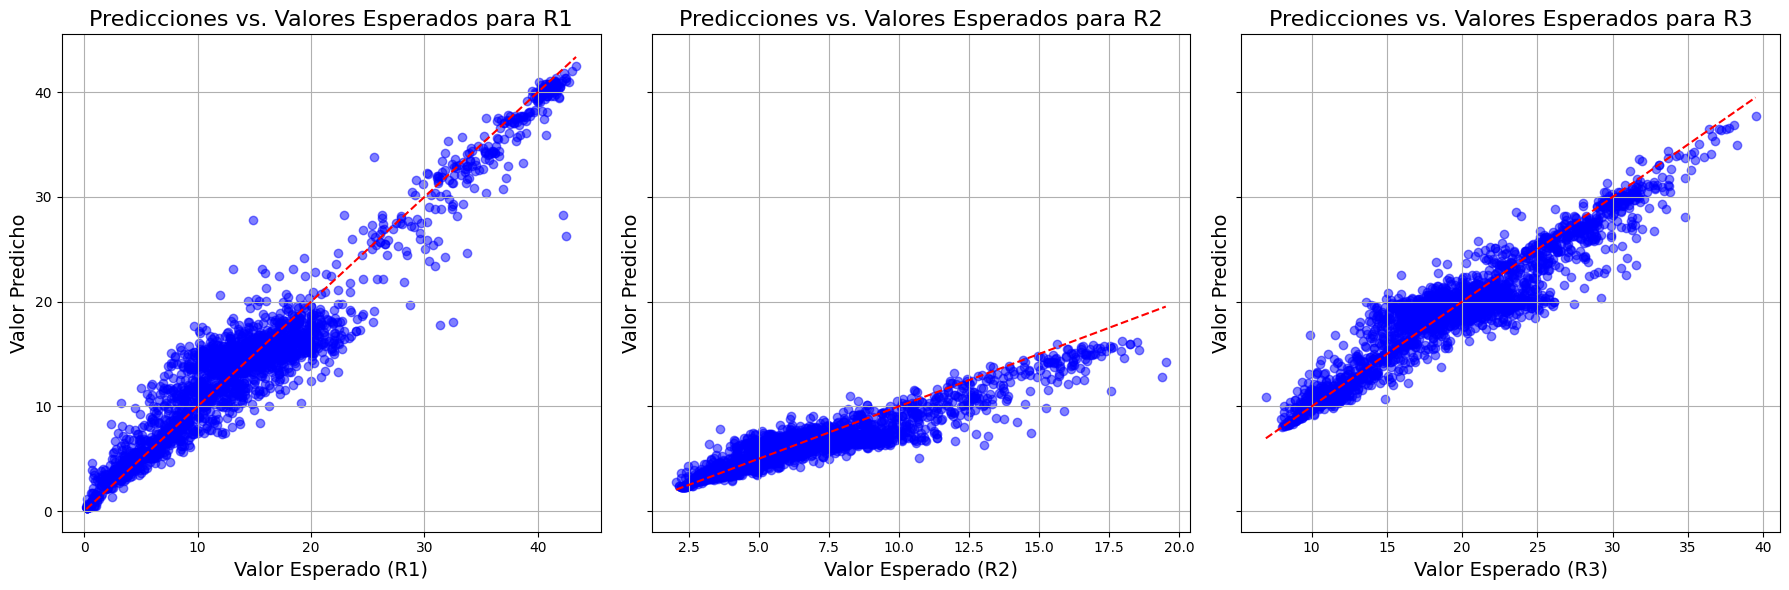

In [57]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Gradient Boosting

In [58]:
# Preparar los conjuntos de entrenamiento y validación
eval_set = [(X_train, y_train), (X_test, y_test)]

In [59]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=123)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [60]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,R1,R2,R3,P_R1,P_R2,P_R3
10793,120,11,25,6,280,-5,45,25,20,5,...,30,-3,105,6,9.12,7.42,18.73,11.259185,6.336163,18.092838
6481,120,11,25,6,280,11,15,12,350,13,...,80,1,15,12,34.00,4.87,28.35,33.662922,4.782299,25.976599
9015,70,11,25,25,270,3,105,6,350,13,...,80,-3,65,6,2.64,6.32,13.20,2.407401,5.881987,13.040746
9864,120,11,25,6,270,11,65,25,330,13,...,60,13,25,25,9.76,10.58,20.80,10.877736,7.565326,18.770744
9108,110,-5,90,6,300,7,110,6,0,3,...,60,5,105,6,1.53,10.36,19.46,1.766898,9.629411,19.796076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,70,7,65,25,260,7,90,6,20,-5,...,90,-3,65,12,7.93,6.10,15.71,8.036700,5.701325,15.538655
6511,70,11,25,25,280,11,15,12,0,13,...,30,13,110,6,40.04,4.49,29.95,39.889336,4.173687,29.357296
6655,70,11,25,25,260,11,110,6,350,-5,...,30,13,110,6,41.08,3.31,29.29,40.593834,3.130714,28.209997
2043,70,7,65,25,250,3,65,25,20,-5,...,70,15,110,25,7.05,7.96,17.76,7.268872,6.397216,15.784044


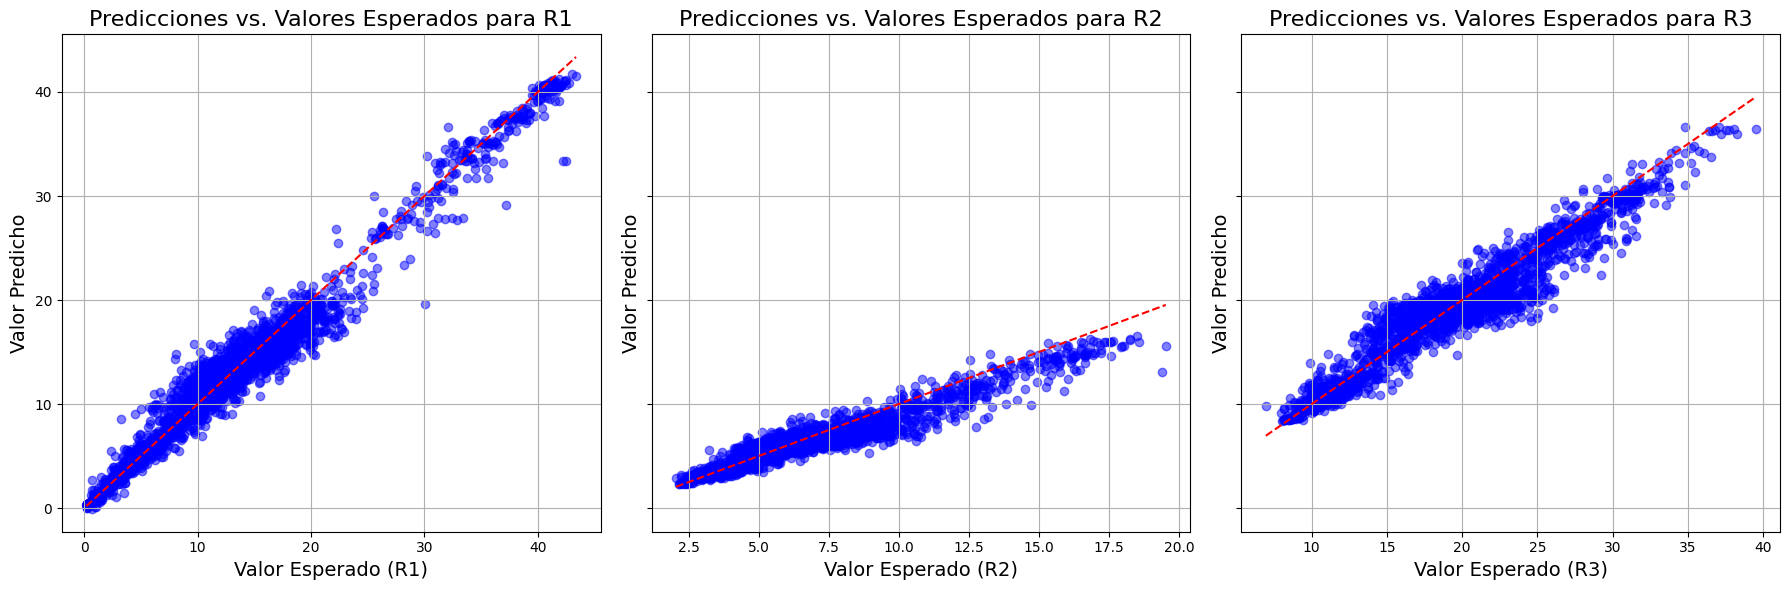

In [61]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

[0]	validation_0-rmse:0.13069	validation_1-rmse:0.14775


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.11988	validation_1-rmse:0.13911
[2]	validation_0-rmse:0.11011	validation_1-rmse:0.13164
[3]	validation_0-rmse:0.10129	validation_1-rmse:0.12526
[4]	validation_0-rmse:0.09335	validation_1-rmse:0.11970
[5]	validation_0-rmse:0.08618	validation_1-rmse:0.11486
[6]	validation_0-rmse:0.07959	validation_1-rmse:0.11048
[7]	validation_0-rmse:0.07367	validation_1-rmse:0.10684
[8]	validation_0-rmse:0.06827	validation_1-rmse:0.10375
[9]	validation_0-rmse:0.06337	validation_1-rmse:0.10097
[10]	validation_0-rmse:0.05898	validation_1-rmse:0.09867
[11]	validation_0-rmse:0.05502	validation_1-rmse:0.09672
[12]	validation_0-rmse:0.05140	validation_1-rmse:0.09497
[13]	validation_0-rmse:0.04815	validation_1-rmse:0.09348
[14]	validation_0-rmse:0.04509	validation_1-rmse:0.09228
[15]	validation_0-rmse:0.04229	validation_1-rmse:0.09122
[16]	validation_0-rmse:0.03975	validation_1-rmse:0.09026
[17]	validation_0-rmse:0.03744	validation_1-rmse:0.08944
[18]	validation_0-rmse:0.03522	validatio

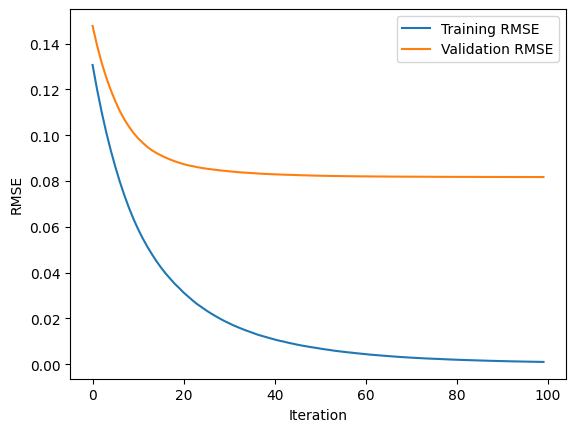

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Preparar los conjuntos de entrenamiento y validación
eval_set = [(X_train, y_train), (X_test, y_test)]

# Entrenar el modelo con seguimiento de las métricas
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

# Obtener la historia de entrenamiento
results = xgb_model.evals_result()

# Graficar la curva de aprendizaje
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
plt.plot(x_axis, results['validation_0']['rmse'], label='Training RMSE')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Optimización Inversa

In [ ]:
# Función objetivo para la optimización inversa
def funcion_objetivo(inputs):
    # Reescalar las entradas a sus valores originales
    inputs_rescaled = train_scaler_dict['225'].inverse_transform(inputs.reshape(1, -1))

    # Hacer predicciones con el modelo
    y_pred = model.predict(inputs_rescaled)

    # Calcular la suma de las salidas de las variables 225, 226 y 227
    suma_salidas = np.sum(y_pred[:, [0, 1, 2]])

    # Devolver el negativo de la suma para que minimice la función objetivo
    return -suma_salidas

# Definir límites para las entradas a las 224 características
limites_entradas = [(0, 1)] * 224  # Suponemos que las entradas están normalizadas entre 0 y 1

# Realizar la optimización utilizando algoritmo genético (differential evolution)
resultado_optimizacion = differential_evolution(funcion_objetivo, bounds=limites_entradas, strategy='best1bin', maxiter=5, popsize=10)

# Las entradas óptimas que maximizan la función objetivo
entradas_optimas = resultado_optimizacion.x

# Imprimir las entradas óptimas
print("Entradas óptimas:")
print(entradas_optimas)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
1/1 [==============================] - 0s 28ms/step
Entradas óptimas:
[0.52449979 0.33772492 0.50815152 0.2215722  0.92174798 0.19873471
 0.05690585 0.11448514 0.20685752 0.01920565 0.87377896 0.06012395
 0.71422703 0.3992615  0.00922588 0.67647463 0.17786569 0.22782305
 0.97538335 0.78782594 0.18850402 0.78145292 0.00407121 0.20741353
 0.02405476 0.31962992 0.27850952 0.73008642 0.93525057 0.32303722
 0.92539523 0.24487673 0.76428519 0.75617208 0.08994161 0.09645166
 0.84857261 0.11528808 0.43685108 0.83329414 0.93967804 0.43270792
 0.19846564 0.54056435 0.70957447 0.36284472 0.50901307 0.46005592
 0.16833399 0.24983984 0.5548747  0.02310493 0.31755188 0.40379616
 0.01354938 0.1809766  0.71113933 0.23671044 0.89727675 0.30214096
 0.777686   0.26429777 0.25292484 0.2951924  0.43087239 0.84658891
 0.06012309 0.44250772 0.4891263  0.45127731 0.44951791 0.81574709
 0.09801412 0.00302613 0.01058154 0.05525888 0.27069275 0.4

In [ ]:
# Reescalar las entradas óptimas a su forma original
entradas_optimas_rescaled = train_scaler_dict['225'].inverse_transform(entradas_optimas.reshape(1, -1))

# Imprimir las entradas óptimas reescaladas
print("Entradas óptimas reescaladas:")
print(entradas_optimas_rescaled)

Entradas óptimas reescaladas:
[[14.59614529 10.35635559 14.2250395   7.71968901 23.61367907  7.201278
   3.98176282  5.28881276  7.38566572  3.12596828 22.5247825   4.05481364
  18.90295354 11.75323599  2.89942754 18.04597404  6.7275512   7.86158315
  24.83120199 20.57364886  6.96904135 20.4289814   2.78241654  7.39828716
   3.23604311  9.94559913  9.01216606 19.26296182 23.92018799 10.02294486
  23.69647178  8.24870176 20.03927379 19.85510623  4.73167458  4.87945265
  21.95259817  5.30703948 12.60651948 21.60577705 24.02069152 12.51246988
   7.19517012 14.96081082 18.79734042 10.92657518 14.24459662 13.13326942
   6.51118167  8.36136431 15.28565561  3.21448194  9.89842765 11.85617293
   2.99757084  6.79816881 18.8328627   8.06332706 23.05818222  9.54859973
  20.3434723   8.68955947  8.43139381  9.39086757 12.4708033  21.90756816
   4.05479407 12.73492532 13.79316696 12.93399502 12.89405665 21.20745893
   4.91492058  2.7586932   2.93020103  3.94437654  8.83472545 12.64216411
   7.78836

# Guardado de inputs

In [ ]:
entradas_optimas_rescaled.shape

(1, 224)

In [ ]:
def escribir_en_archivo(entradas):
  # Verificar si el archivo existe
  if not os.path.exists('resultados.txt'):
    # Crear el archivo
    with open('resultados.txt', 'w') as f:
      f.write('')

  # Abrir el archivo en modo append
  with open('resultados.txt', 'a') as f:
    # Escribir las entradas óptimas en el archivo
    np.savetxt(f, entradas, delimiter=',')

In [ ]:
escribir_en_archivo(entradas_optimas_rescaled)

# Import / Export de Modelos

TensorFlow

In [ ]:
model.save('mlp_model')

In [ ]:
loaded_model = tf.keras.models.load_model('mlp_model')

Pickle

In [ ]:
mlp.save('mlp_model.h5')
with open('mlp_model_pickle.pkl', 'wb') as file:
    pickle.dump('mlp_model.h5', file)

In [ ]:
with open('mlp_model_pickle.pkl', 'rb') as file:
    model_file = pickle.load(file)
loaded_model = tf.keras.models.load_model(model_file)

Joblib

In [ ]:
joblib.dump(mlp, 'mlp_regressor_model.pkl')

['mlp_regressor_model.pkl']

In [ ]:
mlp_loaded = joblib.load('mlp_regressor_model.pkl')